Student Name : 

1) Mohit Patil Email : mohitz4418@gmail.com

## Lead Scoring Case Study.
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1 : Import necessary libraries and  warnings.

In [1]:
# Importing all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

In [2]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

## Step 2 : Reading and Understanding the dataset.

In [4]:
# Reading the "Leads.csv" dataset.

lead_data = pd.read_csv("C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Lead Scoring Case Study\\Lead Scoring Assignment\\Leads.csv")
lead_data_Without_Cleaning = lead_data.copy() 

In [5]:
# Displaying top 5 records from "leads.csv" dataset. 

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Displaying last 5 records from "Leads.csv" dataset.

lead_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [7]:
# Determining the shape of dataset.

lead_data.shape

(9240, 37)

In [8]:
# Describe the data.

lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Understanding the data.

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Check the columns names from dataframe.

lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Step 3 : Data Cleaning.

### 3.1. Handle the "Select" level that is present in many of the categorical variables.

In [11]:
# Replacing 'Select' value with NaN ("Select" means no option is selected.)

lead_data = lead_data.replace("Select", np.nan)

### 3.2. Check the number of unique categories in each categorical column. Here you may need to do something.

In [12]:
# Checking if there are columns with unique values.

lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
# Dropping the unique valued columns.

lead_data = lead_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [14]:
# create shape of dataframe.

lead_data.shape

(9240, 32)

### 3.3. Drop columns that are having high percentage of missing values. Check all the columns before dropping them.

In [15]:
# Check the missing percentage of missing values in dataset columns.

lead_data_null_count = round(lead_data.isnull().sum() * 100 / len(lead_data), 2)
lead_data_null_count

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

"Lead Number" is not of any use in building the model. 

"Lead Quality  ","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score" columns have more than 45% NA Values. Hence dropping the columns.

"Tags" is given to customer manually. Hence dropping the column.

In [16]:
# Removing the columns which have more than 45% of null values.

lead_data = lead_data.drop(["Lead Number", "How did you hear about X Education", "Tags", "Lead Quality",
                             "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index",
                              "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis = 1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [17]:
# checking shape of dataset.

lead_data.shape

(9240, 23)

In [18]:
# Rechecking the missing value percentage.

lead_data_null_count = round(lead_data.isnull().sum() * 100 / len(lead_data), 2)
lead_data_null_count

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### 3.4. For the columns with less percentage of missing values. Use some imputation technique.

#### 1. Lead Source

In [19]:
# For "Lead Source" column check imputation value.

lead_data["Lead Source"].mode()

0    Google
dtype: object

In [20]:
# Imputing the value in "Lead Source" columns.

lead_data["Lead Source"] = lead_data["Lead Source"].fillna("Google")

#### 2. TotalVisits

In [21]:
# For "TotalVisits" column check imputation value.

lead_data.TotalVisits.median()

3.0

In [22]:
# Imputing the value in "TotalVisits" columns.

lead_data["TotalVisits"] = lead_data["TotalVisits"].fillna(3.0)

#### 3. Page Views Per Visit

In [23]:
# For "Page Views Per Visit" column check imputation value.

lead_data["Page Views Per Visit"].median() 

2.0

In [24]:
# Imputing the value in "Page Views Per Visit" columns.

lead_data["Page Views Per Visit"] = lead_data["Page Views Per Visit"].fillna(2.0)

#### 4. Last Activity

In [25]:
# For "Last Activity" column check imputation value.

lead_data["Last Activity"].mode()

0    Email Opened
dtype: object

In [26]:
# Imputing the value in "Last Activity" columns.

lead_data["Last Activity"] = lead_data["Last Activity"].fillna("Email Opened")

#### 5. Country

In [27]:
# For "Country" column check imputation value.

lead_data["Country"].mode()

0    India
dtype: object

In [28]:
# Imputing the value in "Country" columns.

lead_data["Country"] = lead_data["Country"].fillna("India")

#### 6. Specialization

In [29]:
# For "Specialization" column check imputation value.

lead_data["Specialization"].mode()

0    Finance Management
dtype: object

In [30]:
# Imputing the value in "Specialization" columns.

lead_data["Specialization"] = lead_data["Specialization"].fillna("Finance Management")

#### 7. What is your current occupation

In [31]:
# For "What is your current occupation" column check imputation value.

lead_data["What is your current occupation"].mode()

0    Unemployed
dtype: object

In [32]:
# Imputing the value in "What is your current occupation" columns.

lead_data["What is your current occupation"] = lead_data["What is your current occupation"].fillna("Unemployed")

#### 8. What matter most to you in choosing a course

In [33]:
# For "What matters most to you in chossing a course" column check imputation value.

lead_data["What matters most to you in choosing a course"].mode()

0    Better Career Prospects
dtype: object

In [34]:
# Imputing the value in "What matters most to you in choosing a course" columns.

lead_data["What matters most to you in choosing a course"] = lead_data["What matters most to you in choosing a course"].fillna("Better Career Prospects")

#### 9. City

In [35]:
# For "City" column check imputation value.

lead_data["City"].mode()

0    Mumbai
dtype: object

In [36]:
# Imputing the value in "City" columns.

lead_data["City"] = lead_data["City"].fillna("Mumbai")

In [37]:
# Again check for null values percentage.

lead_data_null_count = round(lead_data.isnull().sum() * 100 / len(lead_data), 2)
lead_data_null_count

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [38]:
# Check shape of dataframe.

lead_data.shape

(9240, 23)

### 3.5. Drop categorical columns that are highly skewed.

In [39]:
# Check the columns which ara highly skewed by observing the unique value counts in rach column.

for column in lead_data:
    print(lead_data[column].astype('category').value_counts(normalize = True) * 100)
    print("============================================================================================================")

fffb0e5e-9f92-4017-9f42-781a69da4154    0.010823
56453aec-3f7b-4f30-870c-8f966d393100    0.010823
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    0.010823
53aabd84-5dcc-4299-bbe3-62f3764b07b1    0.010823
539ffa32-1be7-4fe1-b04c-faf1bab763cf    0.010823
                                          ...   
aa4180a5-84f1-4e67-8d90-0c8403070a59    0.010823
aa405742-17ac-4c65-b19e-ab91c241cc53    0.010823
aa30ebb2-8476-41ce-9258-37cc025110d3    0.010823
aa27a0af-eeab-4007-a770-fa8a93fa53c8    0.010823
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.010823
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral

#### 1. Lead Source

In [40]:
# Perform bucketing on columns which are highly skewed but important.

lead_data["Lead Source"] = lead_data["Lead Source"].replace("google", "Google")
lead_data["Lead Source"] = lead_data["Lead Source"].replace(["bing", "Click2call", "Press_Release", "Social Media",
                                                            "Live Chat", "Pay per Click Ads", "welearnblog_Home",
                                                            "NC_EDM", "WeLearn", "blog", "testone",
                                                             "youtubechannel"], "Others")

In [41]:
# Check for unique value counts after bucketing in "Lead Source" column.

lead_data["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

#### 2. Last Activity

In [42]:
# Perform bucketing on columns which are highly skewed but important.

lead_data["Last Activity"] = lead_data["Last Activity"].replace(["Approached upfront", "View in browser link Clicked",
                                                                "Email Marked Spam", "Email Received",
                                                                "Resubscribed to emails", 
                                                                "Visited Booth in Tradeshow"], "Others")

In [43]:
# Check for unique value counts after bucketing in "Last Activity" column.

lead_data["Last Activity"].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

#### 3. Country

In [44]:
# Perform bucketing on columns which are highly skewed but important.

lead_data["Country"] = lead_data["Country"].replace(["Singapore", "Saudi Arabia", "United Kingdom", "Australia", "Qatar", 
                                                     "Bahrain", "Hong Kong", "Oman", "France", "unknown", "Nigeria", 
                                                     "South Africa", "Canada", "Kuwait", "Germany", "Sweden", "Bangladesh", 
                                                     "Netherlands", "Italy", "Ghana", "China", "Asia/Pacific Region", 
                                                     "Philippines", "Uganda", "Belgium", "Liberia", "Switzerland", "Vietnam", 
                                                     "Malaysia", "Sri Lanka", "Russia", "Indonesia", "Kenya", "Tanzania", 
                                                     "Denmark"], "Others")

In [45]:
# Check for unique value counts after bucketing in "Country" column.

lead_data["Country"].value_counts()

India                   8953
Others                   165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

#### 4. Last Notable Activity 

In [46]:
# Perform bucketing on columns which are highly skewed but important.

lead_data["Last Notable Activity"] = lead_data["Last Notable Activity"].replace(["Email Bounced", "Unsubscribed", "Unreachable",
                                                                         "Had a Phone Conversation", "Email Marked Spam",
                                                                         "Approached upfront", "Email Received",
                                                                         "Resubscribed to emails",
                                                                         "View in browser link Clicked",
                                                                         "Form Submitted on Website"], "Others")

In [47]:
# Check for unique value counts after bucketing in "Last Notable Activity" column.

lead_data["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In the above analysis, there are many skewed columns in which almost more than 90% of the data points contain the same values. These skewed columns need to be dropped as it will not affect much in our analysis.

In [48]:
# Dropping highly skewed columns.

lead_data = lead_data.drop(["Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper",
                            "Digital Advertisement", "Through Recommendations"], axis = 1)

In [49]:
# Check all columns from dataframe after dropping highly skewed dataframe. 

lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
# Check the shape of dataframe.

lead_data.shape

(9240, 16)

## Step 4 : EDA.

### 4.1. Now for Numerical columns check for outliers.

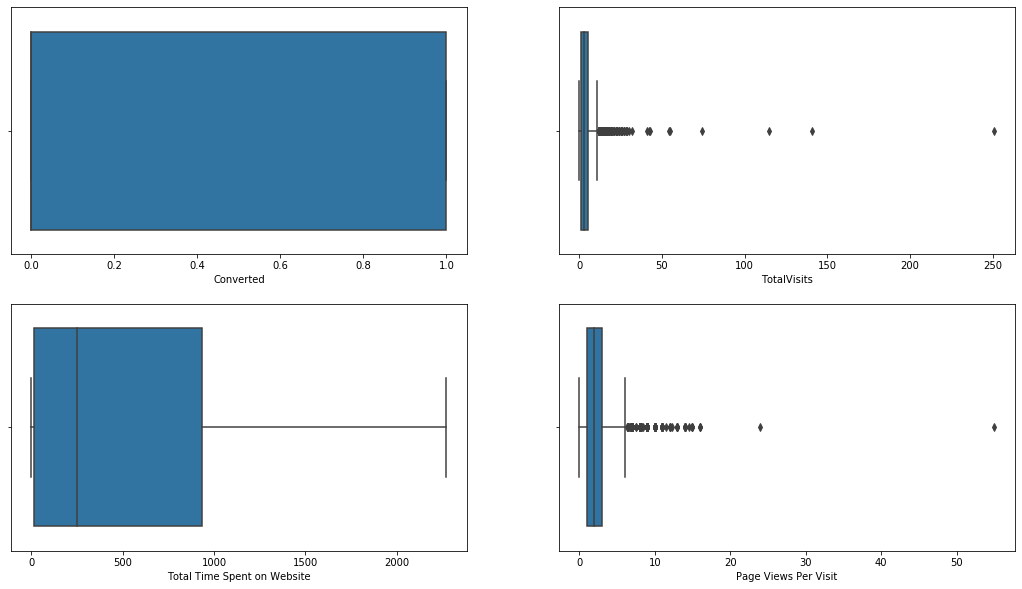

In [51]:
# Plot to check outliers in numerical columns.

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(lead_data["Converted"])
plt.subplot(2,2,2)
sns.boxplot(lead_data["TotalVisits"])
plt.subplot(2,2,3)
sns.boxplot(lead_data["Total Time Spent on Website"])
plt.subplot(2,2,4)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

TotalVisits and Page Views Per Visit contains outliers especially in the higher values. So we need cap the upper set of values.

In [52]:
#creating a list of numeric columns

features = lead_data[["Converted", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] 

In [53]:
# Capping the outliers.

for col in features:
    percentiles = lead_data[col].quantile([0.01,0.95]).values
    lead_data[col][lead_data[col] <= percentiles[0]] = percentiles[0]
    lead_data[col][lead_data[col] >= percentiles[1]] = percentiles[1]

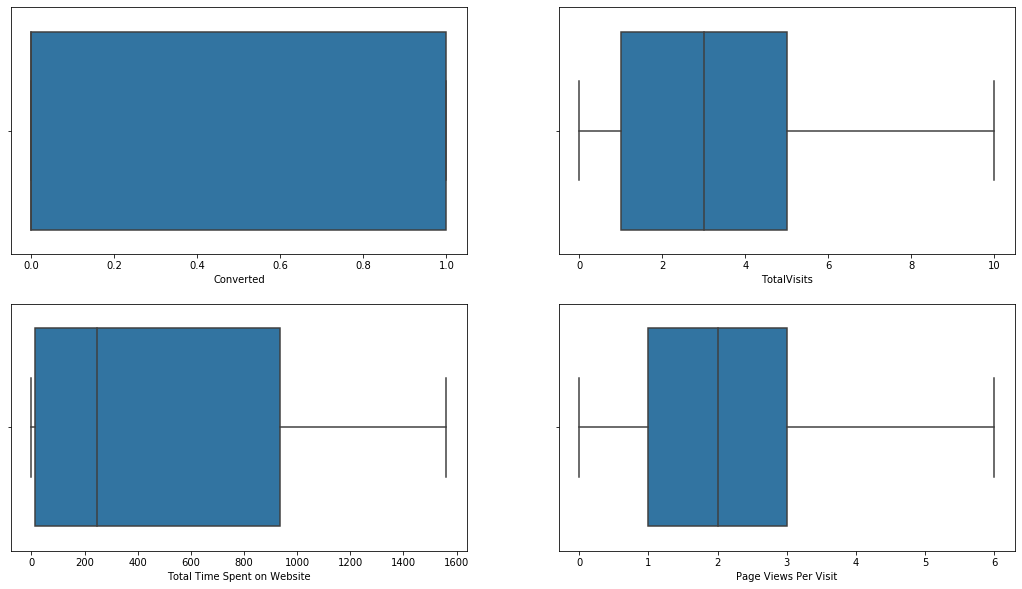

In [54]:
# Plot to check outliers after outlier treatment in numerical columns.

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(lead_data["Converted"])
plt.subplot(2,2,2)
sns.boxplot(lead_data["TotalVisits"])
plt.subplot(2,2,3)
sns.boxplot(lead_data["Total Time Spent on Website"])
plt.subplot(2,2,4)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

In [55]:
# Check the shape of dataframe after capping.

lead_data.shape

(9240, 16)

In [56]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### Dropping "Others" category.

In [57]:
# Dropping the "Other" category from all the columns.

Catog_df = lead_data.select_dtypes(exclude = ["int64", "float64"]).columns
Catog_df

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Dropping the "Others" category from all the columns.

for i in Catog_df:
    lead_data = lead_data.loc[~((lead_data[i] == "Others"))]

#### Retained Rows after data cleaning process

In [59]:
Retained_Data = (len(lead_data) / len(lead_data_Without_Cleaning)) * 100
Retained_Data

96.14718614718615

### 4.2. Univariate Analysis for Categorical Variables.

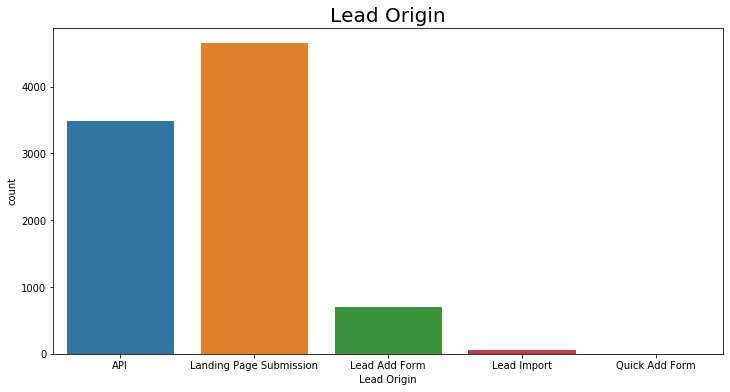

In [60]:
# Univariate analysis for "Lead Origin" column.

plt.figure(figsize = (12, 6))
sns.countplot(lead_data['Lead Origin'])
plt.title("Lead Origin", fontsize = 20)
plt.show()

Observation:
- Most of the customer is identified by Landing Page Submission.

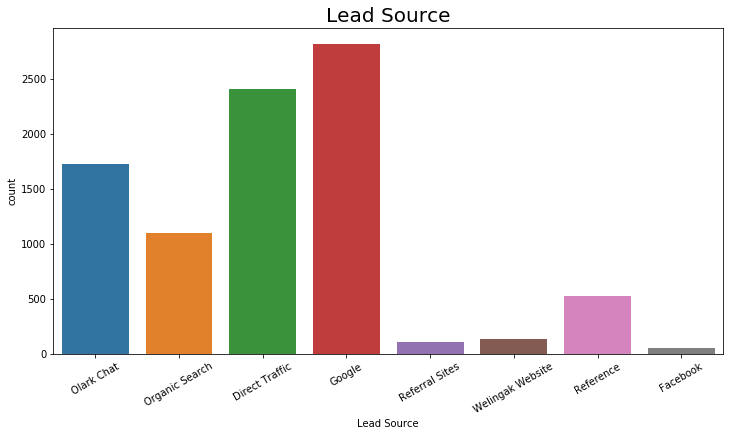

In [61]:
# Univariate analysis for "Lead Source" column.

plt.figure(figsize = (12, 6))
sns.countplot(lead_data['Lead Source'])
plt.xticks(rotation = 30)
plt.title("Lead Source", fontsize = 20)
plt.show()

Observation:
- Most of the customer are from Google and Direct traffic to X education website.

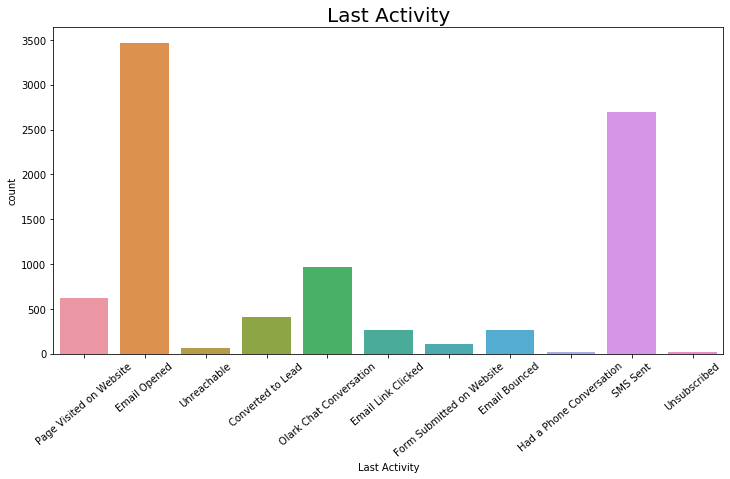

In [62]:
# Univariate analysis for "Last Activity" column.

plt.figure(figsize = (12, 6))
sns.countplot(lead_data['Last Activity'])
plt.xticks(rotation = 40)
plt.title("Last Activity", fontsize = 20)
plt.show()

Observation:
- Most of the customers has performed last activity as Email Opened and SMS Sent.

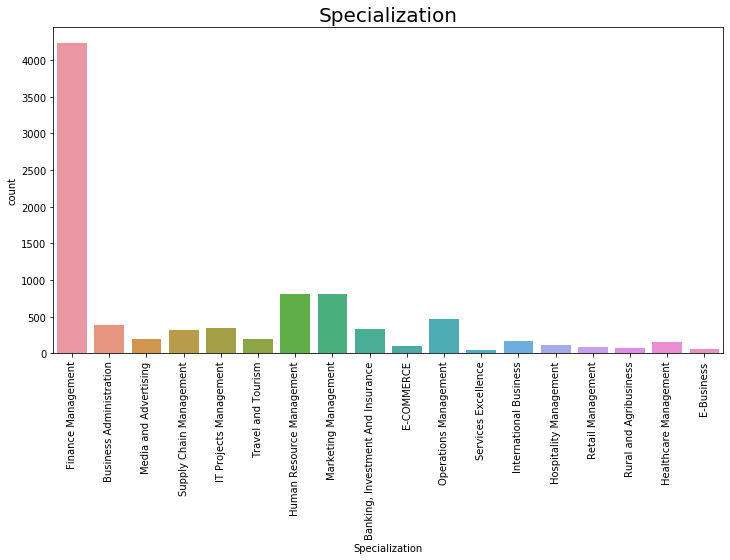

In [63]:
# Univariate analysis for "Specialization" column.

plt.figure(figsize = (12, 6))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation = 90)
plt.title("Specialization", fontsize = 20)
plt.show()

Observation:
- Most of the customers are from Finance Management specialization and worked there before.

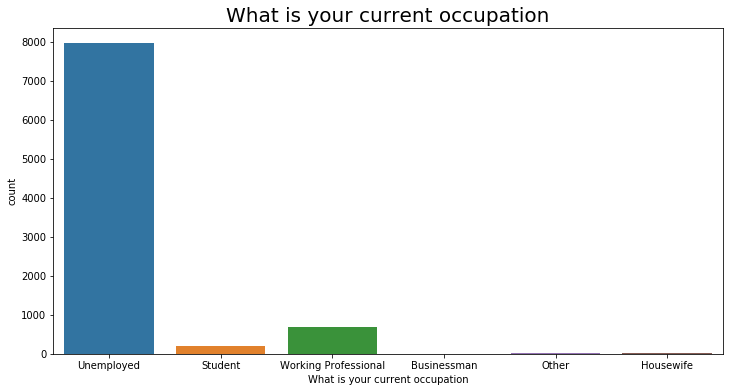

In [64]:
# Univariate analysis for "What is your current occupation" column.

plt.figure(figsize = (12, 6))
sns.countplot(lead_data['What is your current occupation'])
plt.title("What is your current occupation", fontsize = 20)
plt.show()

Observation:
- Most of the customer is Unemployed.

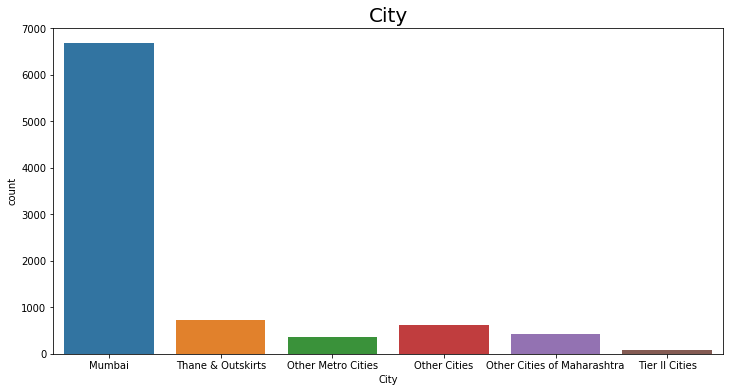

In [65]:
# Univariate analysis for "City" column.

plt.figure(figsize = (12, 6))
sns.countplot(lead_data['City'])
plt.title("City", fontsize = 20)
plt.show()

Observation:
- Most of the customers are from Mumbai City.

### 4.3. Univariate Analysis of Categorical Variables in relation to "Converted" column. 

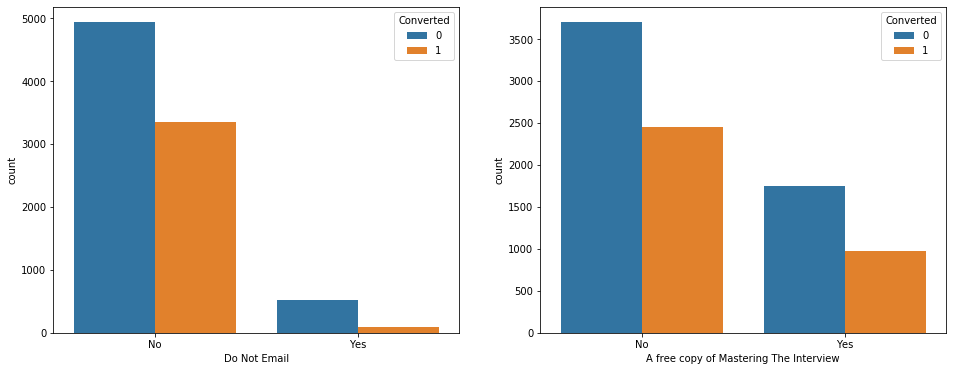

In [66]:
# Univariate analysis of "Do Not Email" and "A free copy of Mastering The Interview" with "Converted" column.

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.countplot(lead_data['Do Not Email'],hue = lead_data.Converted)

plt.subplot(1,2,2)
sns.countplot(lead_data['A free copy of Mastering The Interview'],hue = lead_data.Converted)
plt.show()

Observation:
- Most of the leads do not want to be emailed about the course and also do not want the free copy of mastering the interview.
- Those leads who do not want to be emailed have high chances of getting converted.

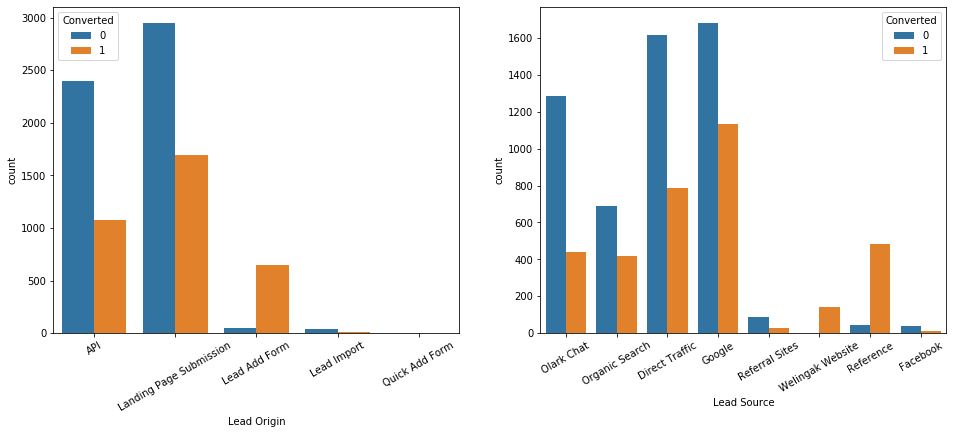

In [67]:
# Univariate analysis of "Lead Origin" and "Lead Source" with "Converted" column.

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.countplot(lead_data['Lead Origin'], hue = lead_data.Converted)
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
sns.countplot(lead_data['Lead Source'], hue = lead_data.Converted)
plt.xticks(rotation = 30)
plt.show()

Observation:

1. Observation from Lead Origin -
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- API and Landing Page Submission bring higher number of leads as well as conversion.
- In order to improve overall lead conversion rate, we need to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


2. Observation from Lead Source -
- Reference and Welingak Website have very high conversion rate but count of leads are not very high.
- Google, Direct Traffic and Olark Chat bring higher number of leads as well as conversion.

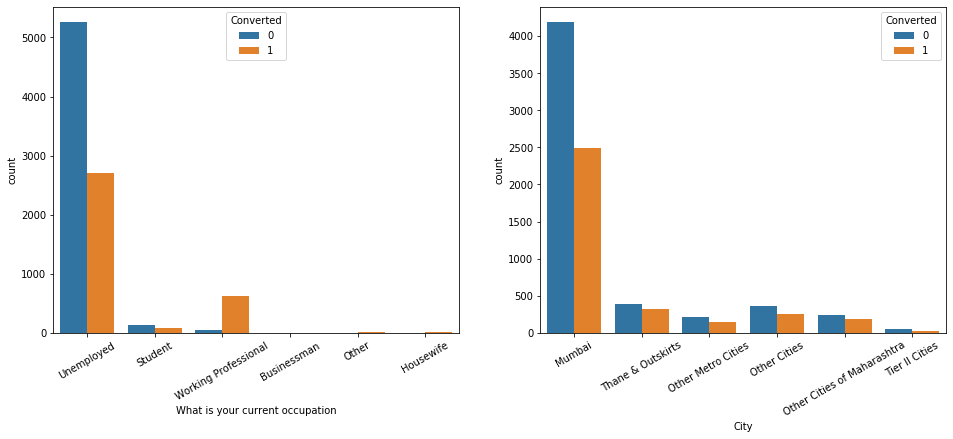

In [68]:
# Univariate analysis of "What is your current occupation" and "City" with "Converted" column.

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.countplot(lead_data['What is your current occupation'], hue = lead_data.Converted)
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
sns.countplot(lead_data['City'], hue = lead_data.Converted)
plt.xticks(rotation = 30)
plt.show()

Observation:
- Working professional checking about the course have high chances of joining the course.
- Higher number of leads as well as conversion from Unemployed category.
- Mumbai has the highest number of leads as well as conversion.

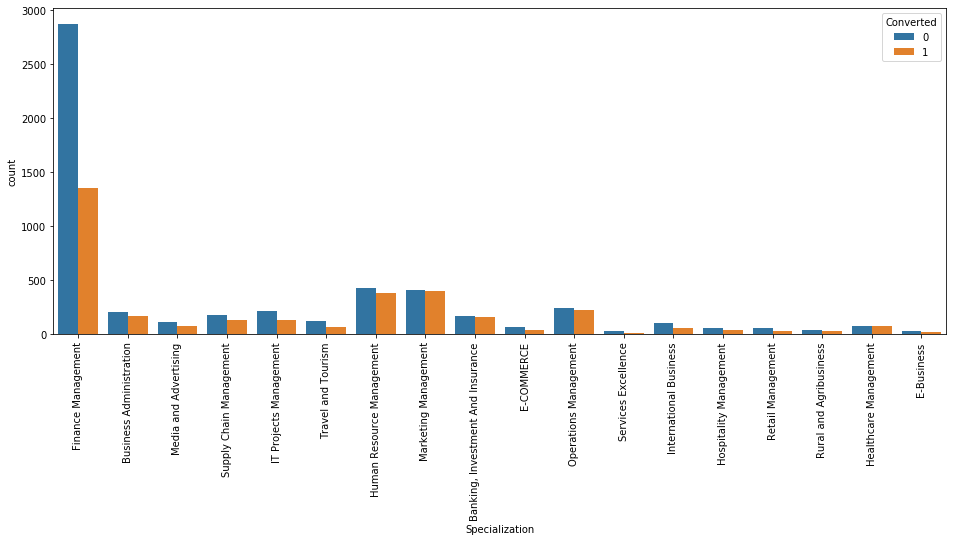

In [69]:
# Univariate analysis of "Specialization" with "Converted" column.

plt.figure(figsize = (16,6))
sns.countplot(lead_data.Specialization, hue = lead_data.Converted)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Highest number of leads as well as conversion fall in 'Others' category. However, this category is the bucket of 'Not Specified' Values.
- Finance Management, Human Resource Management, Marketing Management, Operations Management are showing reasonably good results in terms of count of leads as well as conversion.

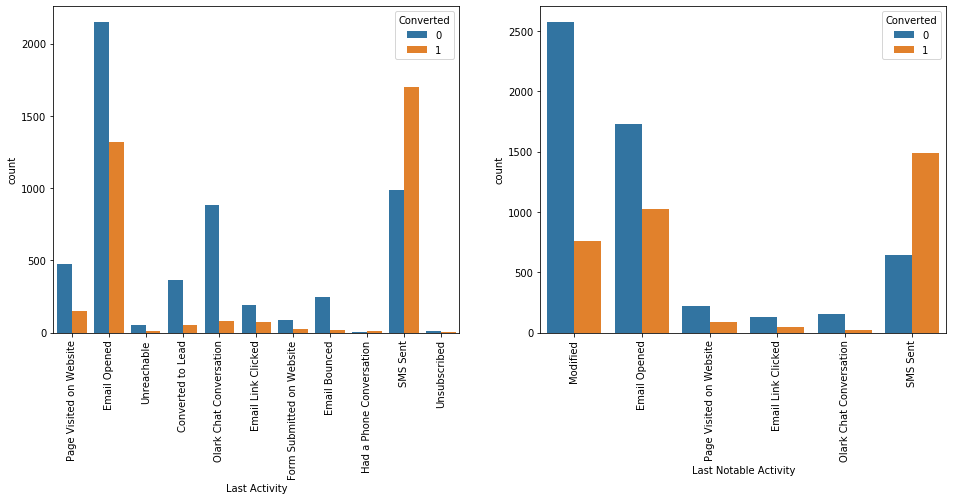

In [70]:
# Univariate analysis of "Last Activity" and "Last Notable Activity" with "Converted" column.

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.countplot(lead_data['Last Activity'], hue = lead_data.Converted)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(lead_data['Last Notable Activity'], hue = lead_data.Converted)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Although the count is high for 'Email Opened', but the highest conversion rate from 'SMS Sent' Category.
- High Conversion rate is for 'Email Opened' and 'SMS Sent' Category.
- Lead count is highest for 'Modified' and 'Email Opened' category.

### 4.4. Univariate analysis for Numerical Variables.

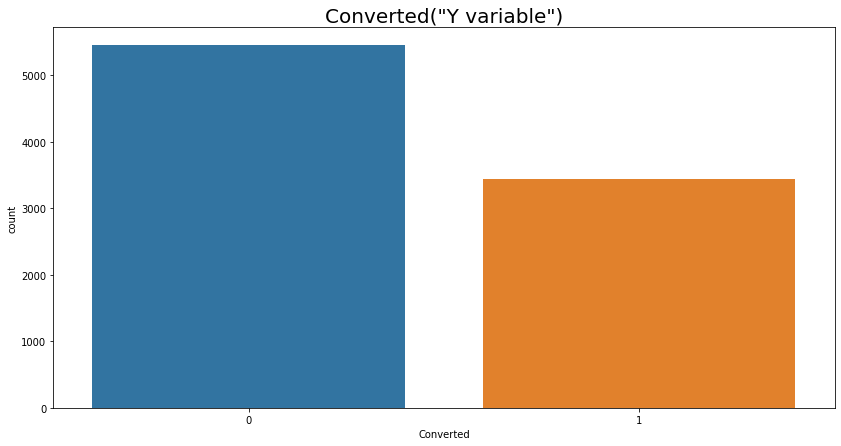

In [71]:
# Univariate analysis for "Converted" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(lead_data['Converted'])
plt.title('Converted("Y variable")', fontsize = 20)
plt.show()

Observation:
- Most of the customers are not converted.

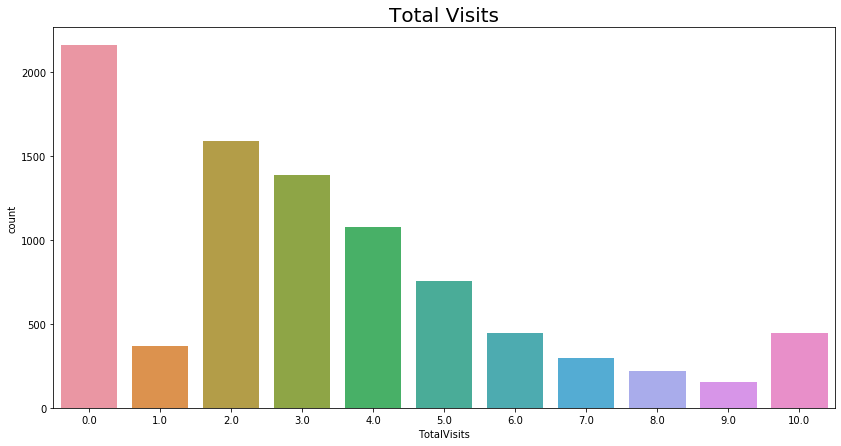

In [72]:
# Univariate analysis for "TotalVisits" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(lead_data['TotalVisits'])
plt.title('Total Visits', fontsize = 20)
plt.show()

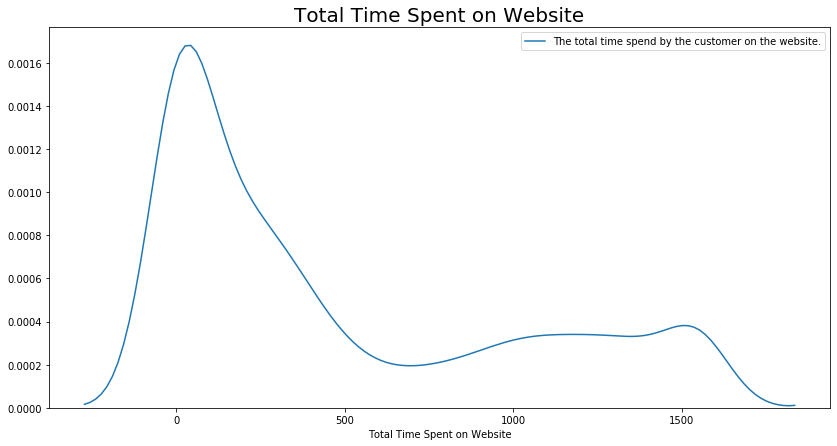

In [73]:
# Univariate analysis for "Converted" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(lead_data['Total Time Spent on Website'], hist = False, label = "The total time spend by the customer on the website.")
plt.title("Total Time Spent on Website", fontsize = 20)
plt.show()

Observation:
- There are very low customers whi spends more time on website.

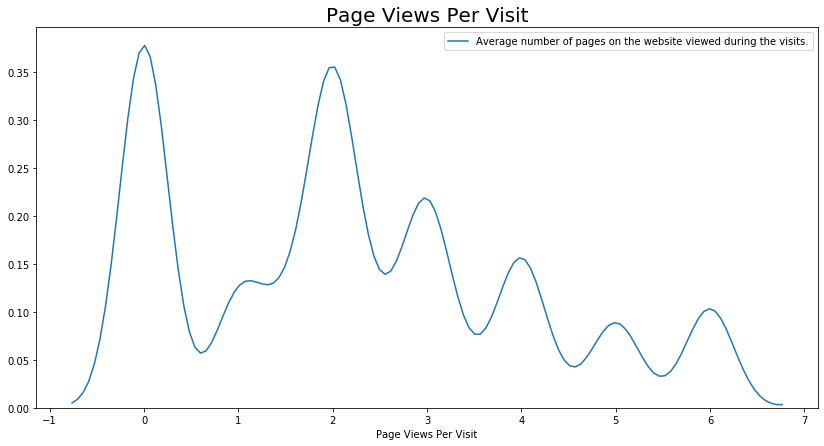

In [74]:
# Univariate analysis for "Total Time Spent on Website" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(lead_data['Page Views Per Visit'], hist = False, label = "Average number of pages on the website viewed during the visits.")
plt.title("Page Views Per Visit", fontsize = 20)
plt.show()

Observation:
- Most customers are visited 4 pages and there are very less customers who visited more than 4 pages.

### 4.5. Bivariate Analysis for Continous - Categorical Variables.

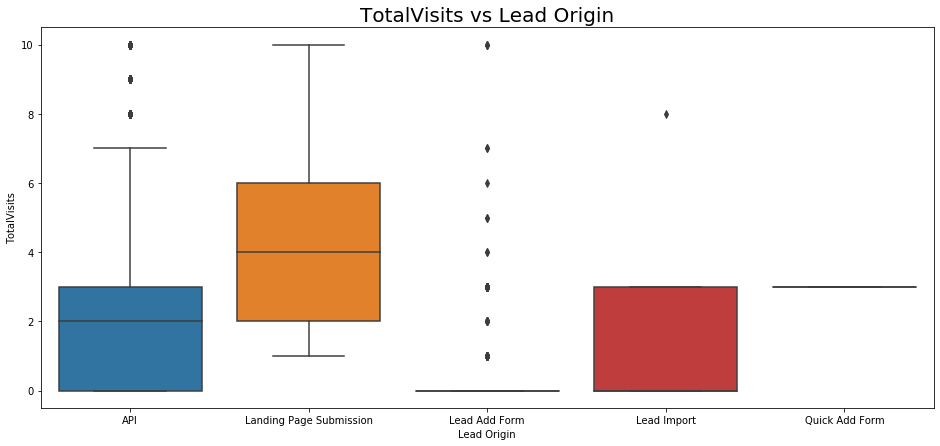

In [75]:
# Bivariate analysis for "Lead Origin" "Total Visits" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Lead Origin", y = "TotalVisits", data = lead_data)
plt.xlabel("Lead Origin")
plt.ylabel("TotalVisits")
plt.title("TotalVisits vs Lead Origin", fontsize = 20)
plt.show()

Observation:
- The customers who has origin as Landing Page Submission has higher amount of total visits followed by API and Lead import. 

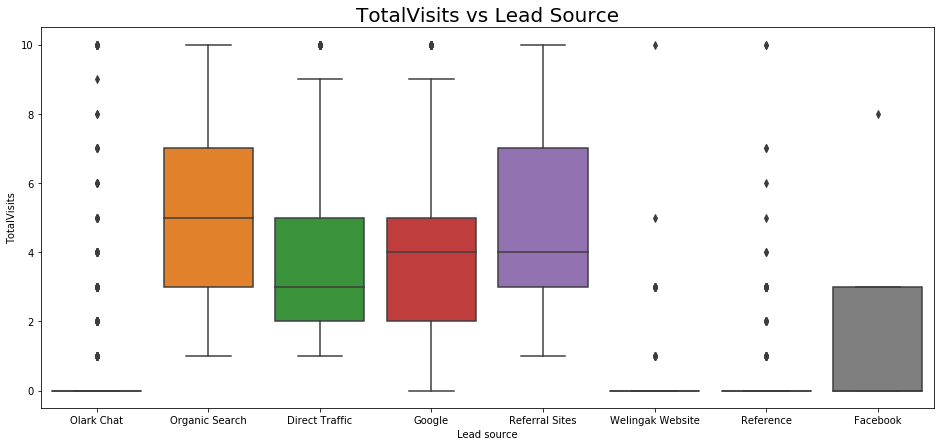

In [76]:
# Bivariate analysis for "Lead Source" "Total Visits" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Lead Source", y = "TotalVisits", data = lead_data)
plt.xlabel("Lead source")
plt.ylabel("TotalVisits")
plt.title("TotalVisits vs Lead Source", fontsize = 20)
plt.show()

Observation:
- The customers who has source as Organic Search has higher amount of total visits followed by Referral Sites Lead Source, Direct Traffic and Google. 

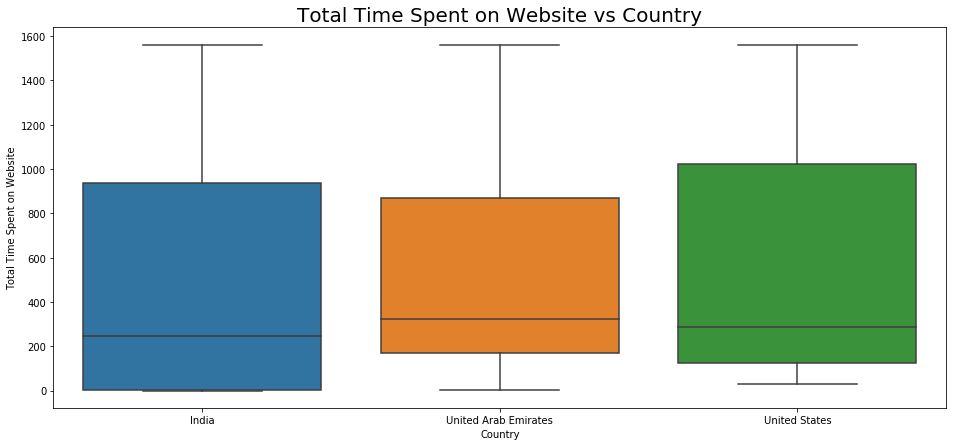

In [77]:
# Bivariate analysis for "Country" "Total Time Spent on Website" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Country", y = "Total Time Spent on Website", data = lead_data)
plt.xlabel("Country")
plt.ylabel("Total Time Spent on Website")
plt.title("Total Time Spent on Website vs Country", fontsize = 20)
plt.show()

Observation:
- Almost every country has same amount of time spent on website.

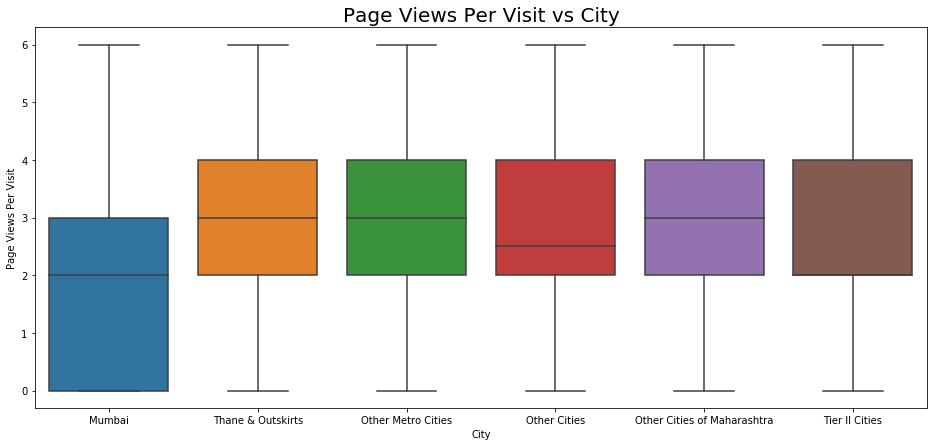

In [78]:
# Bivariate analysis for "City" "Page Views Per Visit" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "City", y = "Page Views Per Visit", data = lead_data)
plt.xlabel("City")
plt.ylabel("Page Views Per Visit")
plt.title("Page Views Per Visit vs City", fontsize = 20)
plt.show()

Observation:
- Every city has almost same number of page views per visit except Mumbai has less number of Page Views Per Visit.

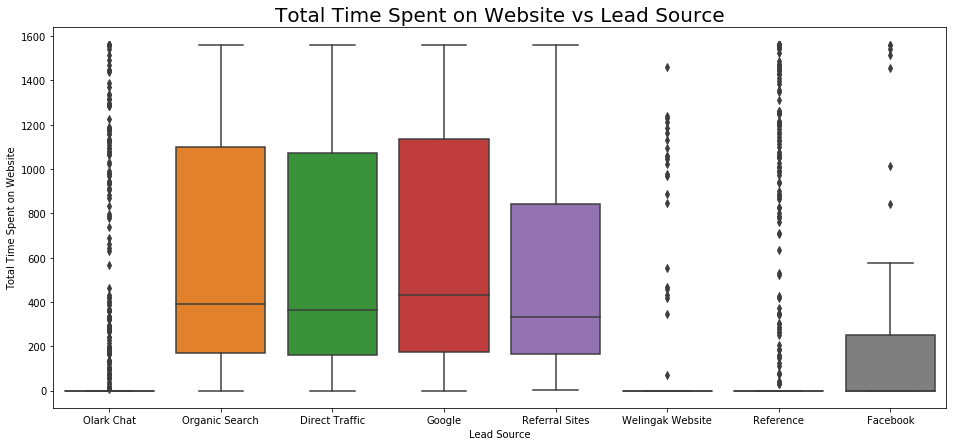

In [79]:
# Bivariate analysis for "Lead Source" "Total Time Spent on Website" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Lead Source", y = "Total Time Spent on Website", data = lead_data)
plt.xlabel("Lead Source")
plt.ylabel("Total Time Spent on Website")
plt.title("Total Time Spent on Website vs Lead Source", fontsize = 20)
plt.show()

Observation:
- The customer who has lead source as "Google", "Direct Traffic", "Organic search" has higher time spent of website.

### 4.6. Bivariate Analysis for Categorical - Categorical variables.

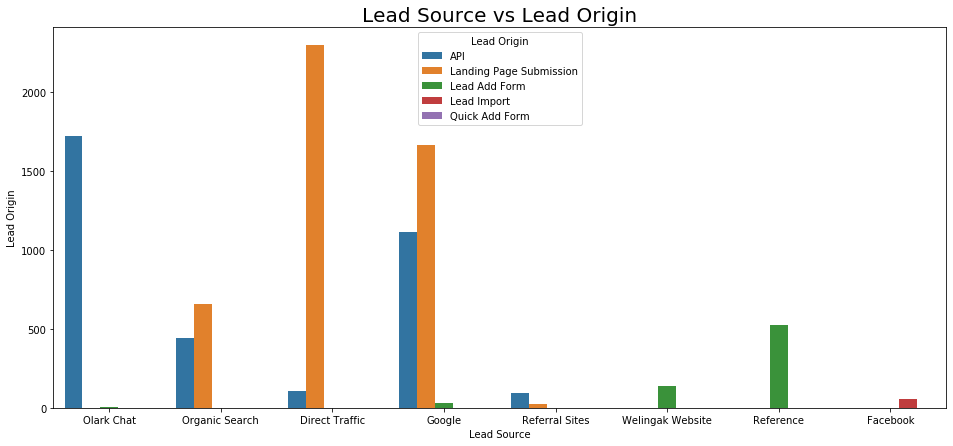

In [80]:
# Bivariate analysis for Lead Source" "Lead Origin" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "Lead Source", hue = "Lead Origin", data = lead_data)
plt.xlabel("Lead Source")
plt.ylabel("Lead Origin")
plt.xticks(rotation = 0)
plt.title("Lead Source vs Lead Origin", fontsize = 20)
plt.show()

Observation:
- The Olark Chat source has API as its origin most of times.
- The most customer which are from Direct Traffic source has origin as Landing Page Submission.
- The most customer which are from Google source has origin as Landing Page Submission.

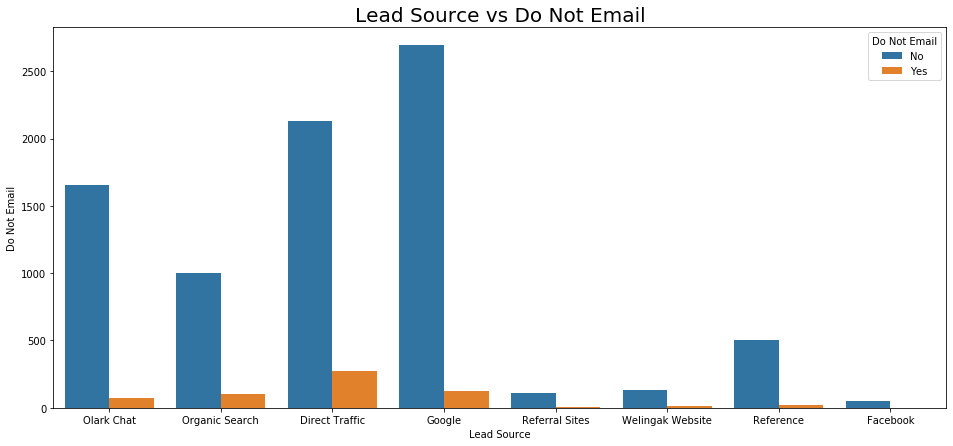

In [81]:
# Bivariate analysis for Lead Source" "Do Not Email" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "Lead Source", hue = "Do Not Email", data = lead_data)
plt.xlabel("Lead Source")
plt.ylabel("Do Not Email")
plt.xticks(rotation = 0)
plt.title("Lead Source vs Do Not Email", fontsize = 20)
plt.show()

Observation:
- The customers who has source as Google, Direct Traffic, Olark Chat and Organic Search does not want to be emailed.

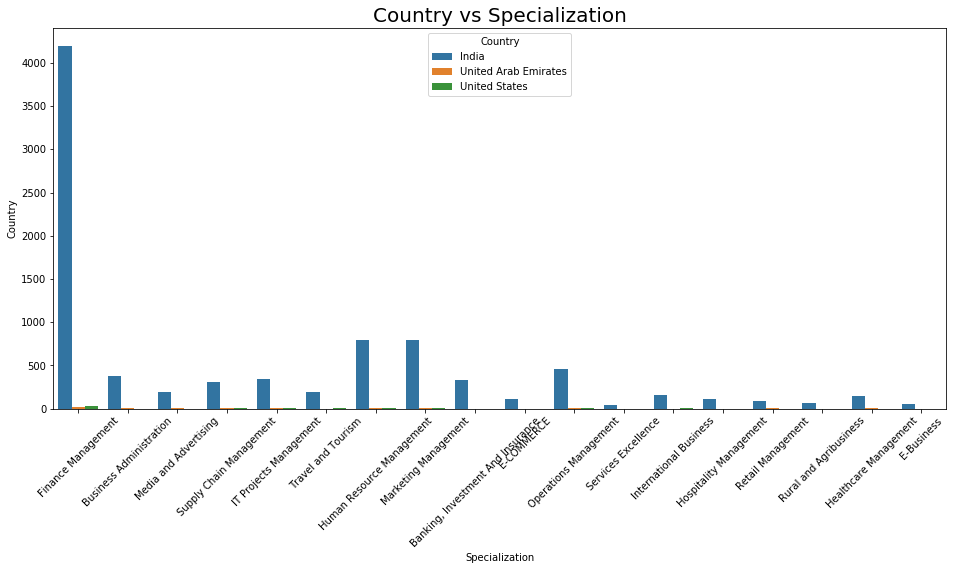

In [82]:
# Bivariate analysis for "Country" "Specialization" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "Specialization", hue = "Country", data = lead_data)
plt.xlabel("Specialization")
plt.ylabel("Country")
plt.xticks(rotation = 45)
plt.title("Country vs Specialization", fontsize = 20)
plt.show()

Observation:
- Customers which are from India has highest Specialization as Finance Management.

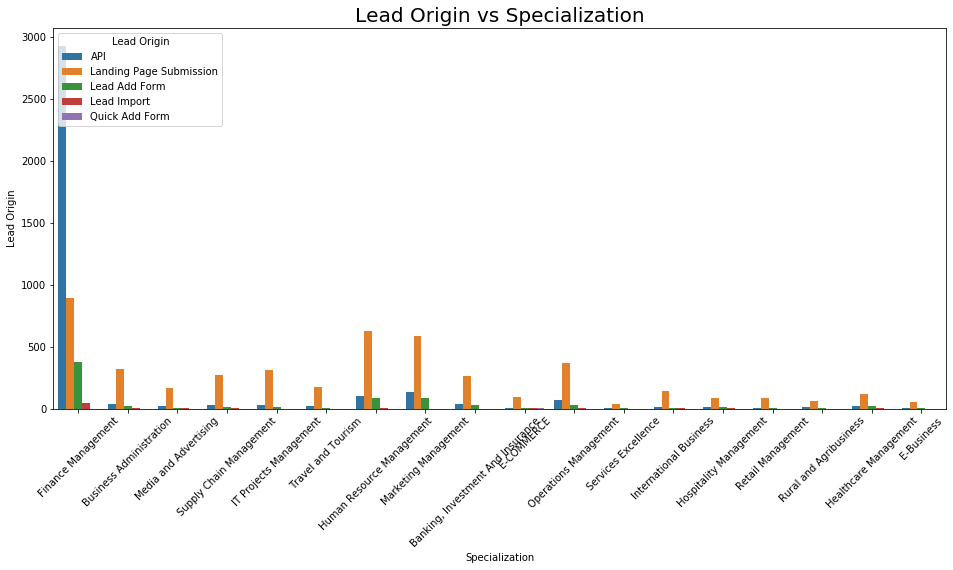

In [83]:
# Bivariate analysis for "Specialization" "Lead Origin" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "Specialization", hue = "Lead Origin", data = lead_data)
plt.xlabel("Specialization")
plt.ylabel("Lead Origin")
plt.xticks(rotation = 45)
plt.title("Lead Origin vs Specialization", fontsize = 20)
plt.show()

Observation:
- The customer who has specialization as Finance Management has Origin as API and Landing Page Submission.
- From every specialization most of the customers has origin as Landin Page submission.

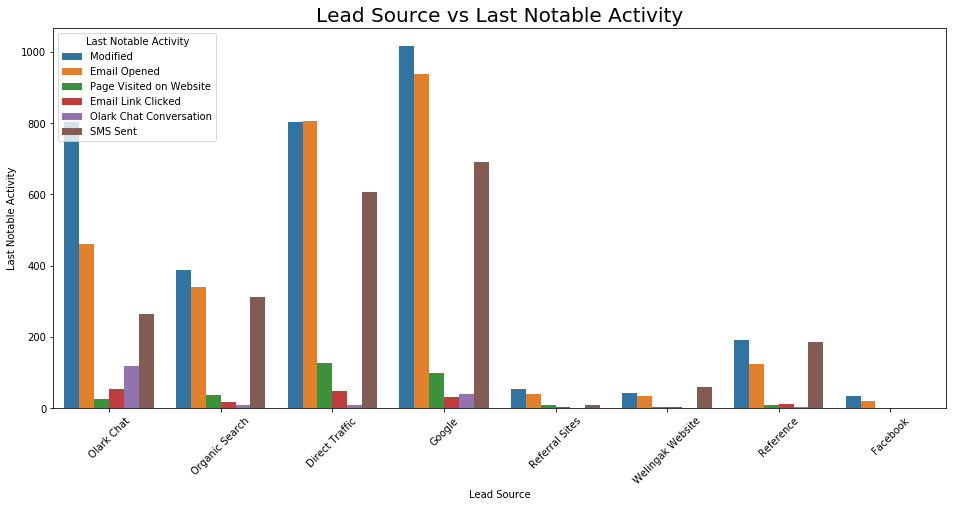

In [84]:
# Bivariate analysis for "Specialization" "Lead Origin" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "Lead Source", hue = "Last Notable Activity", data = lead_data)
plt.xlabel("Lead Source")
plt.ylabel("Last Notable Activity")
plt.xticks(rotation = 45)
plt.title("Lead Source vs Last Notable Activity", fontsize = 20)
plt.show()

Observation:
- Most of the customers which has Source as Google, Direct traffic, Olark Chat and Organic Search has Last notable activity as Modified and Email Opened.

## Step 5 : Data Preperation.

In our dataframe we have one column which is sales team column. This column is generated once the sales team get into call with the student so we need to drop it.

In [85]:
# Dropping the "Last Activity" column.

lead_data = lead_data.drop(['Last Activity'], axis = 1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No,Modified


In [86]:
# Checking shape of dataset after dropping column.

lead_data.shape

(8884, 15)

### 5.1. Converting some binary variables (Yes/No) to (0/1).

In [87]:
# Get list of fetures which has Yes/No values.
Feature_List = ["Do Not Email", "A free copy of Mastering The Interview"]

# Defining a Function to convert features into binary.
def binary_conversion(x):
    return x.map({"Yes" : 1, "No" : 0})

# Applying function to the features.
lead_data[Feature_List] = lead_data[Feature_List].apply(binary_conversion)

In [88]:
# Checking top 5 rows from dataframe after converting some variables in binary.

lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified


### 5.2. Create Dummy Variables.

In [89]:
## Creating a dummy variable for some of the categorical variables and dropping the first one.

Dummy_Variables = pd.get_dummies(lead_data[["Lead Origin", "Lead Source", "Country", "Specialization",
                                            "What is your current occupation", "What matters most to you in choosing a course",
                                           "City", "Last Notable Activity"]], drop_first = True)

# Adding the result into main dataframe.

lead_data = pd.concat([lead_data, Dummy_Variables], axis = 1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [90]:
# Dropping the repeated variables.

lead_data = lead_data.drop(["Prospect ID", "Lead Origin", "Lead Source", "Country", "Specialization", 
                            "What is your current occupation", "What matters most to you in choosing a course",
                            "City", "Last Notable Activity"], 1)
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


### 5.3. Perform Train - Test Split.

In [91]:
# Putting feature variable to X.

X = lead_data.drop("Converted",  axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [92]:
# Putting response variable to y

y = lead_data["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Split the dataset into 70% train data and 30% test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### 5.4. Feature Scaling.

In [94]:
# Check top 5 rows from train data.

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [95]:
# Perform scalling on data.

scaler = StandardScaler()
numerical_columns = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2609,0,0.688207,-0.881578,1.573477,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3971,0,2.507471,2.054784,2.136005,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
324,0,1.052060,-0.501778,0.448420,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
7127,0,1.779765,-0.411080,1.010949,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3064,0,-0.039498,-0.371399,-0.114108,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0


## Step 6 : Modelling.

In [96]:
# Create object of LogisticRegression.

logistic_regression = LogisticRegression()

### 6.1. Use techniques like RFE to perform variable selection.

In [97]:
# Create object of RFE and run RFE with 15 variables.

rfe = RFE(logistic_regression, 15)
rfe = rfe.fit(X_train, y_train)

In [98]:
# Check result after RFE for each column.

rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True])

In [99]:
# Check the ranking of columns from result of RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_United Arab Emirates', False, 11),
 ('Country_United States', False, 14),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 35),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Healthcare Management', False, 28),
 ('Specialization_Hos

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### 6.2. Use statsmodels to build the model.

In [101]:
# Use statsmodel to build model

X_train_sm = sm.add_constant(X_train[col])
logistic_model_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_1.fit()
# Lets see the summary of our model.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6202
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.1
Date:                Fri, 15 Jan 2021   Deviance:                       5202.2
Time:                        00:18:45   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5481      0.538     -1.019      0.308      -1.603       0.506
Do Not Email                                            -1.5707      0.197     -7.971      0.000      -1.957      -1.184
Total Time Spent on Website                              1.1494      0.041     28.120      0.000       1.069       1.230
Lead Origin_Landing Page Submission                     -0.2181      0.090     -2.426      0.015      -0.394      -0.042
Lead Origin_Lead Add Form                                3.5721      0.207     17.234      0.000       3.166       3.978
Lead Origin_Quick Add Form                              23.5216   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.9093      0.117      7.764      0.000       0.680       1.139
Lead Source_Welingak Website                             2.9408      1.026      2.865      0.004       0.929       4.953
Specialization_Retail Management                        -0.7180      0.382     -1.878      0.060      -1.467       0.031
What is your current occupation_Housewife               21.0492   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Student                 -1.0606      0.579     -1.833      0.067      -2.195       0.074
What is your current occupation_Unemployed              -1.1986      0.534     -2.245      0.025      -2.245      -0.152
What is your current occupation_Working Professional     1.5158      0.564      2.686      0.007       0.410       2.622
Last Notable Activity_Email Opened                       0.7292      0.083      8.823      0.000       0.567       0.891
Last Notable Activity_Olark Chat Conversation           -1.0021      0.339     -2.956      0.003      -1.667      -0.338
Last Notable Activity_SMS Sent                           2.1786      0.091     23.857      0.000       2.000       2.358
========================================================================================================================
"""

The variable "Lead Origin_Quick Add Form" has very high p-value, So we drop it.

In [102]:
# Dropping the column which have high p-value

col = col.drop("Lead Origin_Quick Add Form", 1)

In [103]:
# Building second model.

X_train_sm = sm.add_constant(X_train[col])
logistic_model_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_2.fit()
# Lets see the summary of our model.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.4
Date:                Fri, 15 Jan 2021   Deviance:                       5204.7
Time:                        00:18:45   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5472      0.538     -1.017      0.309      -1.602       0.507
Do Not Email                                            -1.5442      0.195     -7.909      0.000      -1.927      -1.162
Total Time Spent on Website                              1.1511      0.041     28.165      0.000       1.071       1.231
Lead Origin_Landing Page Submission                     -0.2224      0.090     -2.476      0.013      -0.399      -0.046
Lead Origin_Lead Add Form                                3.5681      0.207     17.224      0.000       3.162       3.974
Lead Source_Olark Chat                                   0.9075      0.117      7.751      0.000       0.678       1.137
Lead Source_Welingak Website                             2.9414      1.026      2.866      0.004       0.930       4.953
Specialization_Retail Management                        -0.7184      0.382     -1.879      0.060      -1.468       0.031
What is your current occupation_Housewife               21.0517   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Student                 -1.0587      0.579     -1.829      0.067      -2.193       0.076
What is your current occupation_Unemployed              -1.1959      0.534     -2.240      0.025      -2.242      -0.149
What is your current occupation_Working Professional     1.5174      0.564      2.689      0.007       0.411       2.624
Last Notable Activity_Email Opened                       0.7283      0.083      8.812      0.000       0.566       0.890
Last Notable Activity_Olark Chat Conversation           -1.0048      0.339     -2.963      0.003      -1.669      -0.340
Last Notable Activity_SMS Sent                           2.1765      0.091     23.844      0.000       1.998       2.355
========================================================================================================================
"""

Lets check VIF also

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,5.55
2,Lead Origin_Landing Page Submission,3.57
4,Lead Source_Olark Chat,2.26
3,Lead Origin_Lead Add Form,1.83
11,Last Notable Activity_Email Opened,1.79
13,Last Notable Activity_SMS Sent,1.65
10,What is your current occupation_Working Profes...,1.55
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.15


The variable "What is your current occupation_Housewife" has high p-value. so we can drop it.

In [105]:
# Dropping the column with high p-value

col = col.drop('What is your current occupation_Housewife', 1)

In [106]:
# Building third Model

X_train_sm = sm.add_constant(X_train[col])
logistic_model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_3.fit()
# Chcek the summary of our model.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.8
Date:                Fri, 15 Jan 2021   Deviance:                       5207.6
Time:                        00:18:45   Pearson chi2:                 6.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2363      0.494     -0.478      0.632      -1.204       0.732
Do Not Email                                            -1.5480      0.195     -7.921      0.000      -1.931      -1.165
Total Time Spent on Website                              1.1516      0.041     28.176      0.000       1.071       1.232
Lead Origin_Landing Page Submission                     -0.2209      0.090     -2.459      0.014      -0.397      -0.045
Lead Origin_Lead Add Form                                3.5772      0.207     17.285      0.000       3.172       3.983
Lead Source_Olark Chat                                   0.9083      0.117      7.757      0.000       0.679       1.138
Lead Source_Welingak Website                             2.9341      1.026      2.859      0.004       0.922       4.946
Specialization_Retail Management                        -0.7188      0.382     -1.880      0.060      -1.468       0.031
What is your current occupation_Student                 -1.3708      0.538     -2.549      0.011      -2.425      -0.317
What is your current occupation_Unemployed              -1.5077      0.489     -3.081      0.002      -2.467      -0.549
What is your current occupation_Working Professional     1.2055      0.522      2.308      0.021       0.182       2.229
Last Notable Activity_Email Opened                       0.7275      0.083      8.807      0.000       0.566       0.889
Last Notable Activity_Olark Chat Conversation           -1.0049      0.339     -2.963      0.003      -1.670      -0.340
Last Notable Activity_SMS Sent                           2.1763      0.091     23.842      0.000       1.997       2.355
========================================================================================================================
"""

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,5.52
2,Lead Origin_Landing Page Submission,3.56
4,Lead Source_Olark Chat,2.26
3,Lead Origin_Lead Add Form,1.81
10,Last Notable Activity_Email Opened,1.79
12,Last Notable Activity_SMS Sent,1.65
9,What is your current occupation_Working Profes...,1.54
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.15


The variable "Specialization_Retail Management" has high p-value. so we can drop it.

In [108]:
# Dropping the column with high p-value

col = col.drop('Specialization_Retail Management', 1)

In [109]:
# Building fourth Model

X_train_sm = sm.add_constant(X_train[col])
logistic_model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_4.fit()
# Check the summary of model.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6205
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.6
Date:                Fri, 15 Jan 2021   Deviance:                       5211.2
Time:                        00:18:46   Pearson chi2:                 6.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2314      0.494     -0.469      0.639      -1.199       0.736
Do Not Email                                            -1.5461      0.195     -7.923      0.000      -1.929      -1.164
Total Time Spent on Website                              1.1492      0.041     28.165      0.000       1.069       1.229
Lead Origin_Landing Page Submission                     -0.2290      0.090     -2.553      0.011      -0.405      -0.053
Lead Origin_Lead Add Form                                3.5756      0.207     17.279      0.000       3.170       3.981
Lead Source_Olark Chat                                   0.9042      0.117      7.726      0.000       0.675       1.134
Lead Source_Welingak Website                             2.9333      1.026      2.858      0.004       0.922       4.945
What is your current occupation_Student                 -1.3833      0.538     -2.572      0.010      -2.437      -0.329
What is your current occupation_Unemployed              -1.5130      0.489     -3.092      0.002      -2.472      -0.554
What is your current occupation_Working Professional     1.1868      0.522      2.274      0.023       0.164       2.210
Last Notable Activity_Email Opened                       0.7297      0.083      8.835      0.000       0.568       0.892
Last Notable Activity_Olark Chat Conversation           -0.9992      0.339     -2.948      0.003      -1.664      -0.335
Last Notable Activity_SMS Sent                           2.1745      0.091     23.835      0.000       1.996       2.353
========================================================================================================================
"""

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,5.52
2,Lead Origin_Landing Page Submission,3.55
4,Lead Source_Olark Chat,2.26
3,Lead Origin_Lead Add Form,1.81
9,Last Notable Activity_Email Opened,1.79
11,Last Notable Activity_SMS Sent,1.65
8,What is your current occupation_Working Profes...,1.54
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.15


The variable "What is your current occupation_Unemployed" has high VIF-value. so we can drop it.

In [111]:
# Dropping the column with high VIF-value

col = col.drop('What is your current occupation_Unemployed', 1)

In [112]:
# Building fifth Model

X_train_sm = sm.add_constant(X_train[col])
logistic_model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_4.fit()
# Check the summary of model.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.7
Date:                Fri, 15 Jan 2021   Deviance:                       5221.5
Time:                        00:18:46   Pearson chi2:                 6.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7344      0.090    -19.243      0.000      -1.911      -1.558
Do Not Email                                            -1.5404      0.195     -7.908      0.000      -1.922      -1.159
Total Time Spent on Website                              1.1513      0.041     28.238      0.000       1.071       1.231
Lead Origin_Landing Page Submission                     -0.2281      0.090     -2.546      0.011      -0.404      -0.053
Lead Origin_Lead Add Form                                3.5980      0.207     17.410      0.000       3.193       4.003
Lead Source_Olark Chat                                   0.9019      0.117      7.710      0.000       0.673       1.131
Lead Source_Welingak Website                             2.9042      1.026      2.830      0.005       0.893       4.916
What is your current occupation_Student                  0.1189      0.230      0.517      0.605      -0.332       0.569
What is your current occupation_Working Professional     2.6895      0.190     14.121      0.000       2.316       3.063
Last Notable Activity_Email Opened                       0.7314      0.082      8.870      0.000       0.570       0.893
Last Notable Activity_Olark Chat Conversation           -1.0082      0.339     -2.973      0.003      -1.673      -0.344
Last Notable Activity_SMS Sent                           2.1639      0.091     23.751      0.000       1.985       2.343
========================================================================================================================
"""

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.82
3,Lead Origin_Lead Add Form,1.55
8,Last Notable Activity_Email Opened,1.52
10,Last Notable Activity_SMS Sent,1.48
4,Lead Source_Olark Chat,1.41
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.27
7,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.12
9,Last Notable Activity_Olark Chat Conversation,1.06


The variable "What is your current occupation_Student" has high p-value. so we can drop it.

In [114]:
# Dropping the column with high p-value

col = col.drop('What is your current occupation_Student', 1)

In [115]:
# Building sixth Model

X_train_sm = sm.add_constant(X_train[col])
logistic_model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_4.fit()
# Check the summary of model.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.9
Date:                Fri, 15 Jan 2021   Deviance:                       5221.8
Time:                        00:18:46   Pearson chi2:                 6.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7326      0.090    -19.239      0.000      -1.909      -1.556
Do Not Email                                            -1.5405      0.195     -7.906      0.000      -1.922      -1.159
Total Time Spent on Website                              1.1515      0.041     28.243      0.000       1.072       1.231
Lead Origin_Landing Page Submission                     -0.2274      0.090     -2.539      0.011      -0.403      -0.052
Lead Origin_Lead Add Form                                3.6025      0.206     17.450      0.000       3.198       4.007
Lead Source_Olark Chat                                   0.9036      0.117      7.728      0.000       0.674       1.133
Lead Source_Welingak Website                             2.8976      1.026      2.823      0.005       0.886       4.909
What is your current occupation_Working Professional     2.6867      0.190     14.111      0.000       2.314       3.060
Last Notable Activity_Email Opened                       0.7325      0.082      8.885      0.000       0.571       0.894
Last Notable Activity_Olark Chat Conversation           -1.0032      0.339     -2.962      0.003      -1.667      -0.339
Last Notable Activity_SMS Sent                           2.1631      0.091     23.748      0.000       1.985       2.342
========================================================================================================================
"""

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.81
3,Lead Origin_Lead Add Form,1.55
7,Last Notable Activity_Email Opened,1.52
9,Last Notable Activity_SMS Sent,1.48
4,Lead Source_Olark Chat,1.41
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.27
6,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.12
8,Last Notable Activity_Olark Chat Conversation,1.06


Now we have p-value less than 0.05 and also we have low VIF value so we can proceed with these model.

### 6.3. Model Prediction.

In [117]:
# Getting the predicted values on the train set.

y_train_pred = res.predict(X_train_sm)
y_train_pred

2609    0.357856
3971    0.928846
324     0.073244
7127    0.770867
3064    0.984155
          ...   
5015    0.876283
7570    0.934760
1414    0.356589
7572    0.053919
1355    0.134515
Length: 6218, dtype: float64

In [118]:
# Reshaping the array.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.3578557 , 0.92884636, 0.0732439 , ..., 0.35658923, 0.0539188 ,
       0.13451489])

In [119]:
# Create a dataframe which shows converted and probability of predicted ones.

y_train_pred_final = pd.DataFrame({"Converted" : y_train.values, "Conversion_Probability" : y_train_pred})
y_train_pred_final["Lead_ID"] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID
0,1,0.357856,2609
1,1,0.928846,3971
2,0,0.073244,324
3,1,0.770867,7127
4,0,0.984155,3064


In [120]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final["Predicted_Value"] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,Predicted_Value
0,1,0.357856,2609,0
1,1,0.928846,3971,1
2,0,0.073244,324,0
3,1,0.770867,7127,1
4,0,0.984155,3064,1


### 6.4. Model Evaluation.

#### Confusion Matrix.

In [121]:
# Create confusion matrix to evaluate the model.

conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)
conf_matrix

array([[3339,  462],
       [ 715, 1702]], dtype=int64)

#### TP, TN, FP, FN.

In [122]:
# Check True Positive
True_Positive = conf_matrix[1, 1]

# Check True Negative
True_Negative = conf_matrix[0, 0]

# Check False Positive
False_Positive = conf_matrix[0, 1]

# Check False Negative
False_Negative = conf_matrix[1, 0]

#### Accuracy.

In [123]:
# Check for accuracy of model.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)

0.810710839498231

#### Sensitivity.

In [124]:
# Check the sensitivity for model.

Sensitivity = True_Positive / float(True_Positive + False_Negative)
Sensitivity

0.7041787339677286

#### Specificity.

In [125]:
# Check the specificity for model.

Specificity = True_Negative / float(True_Negative + False_Positive)
Specificity

0.8784530386740331

### 6.5. Plotting ROC Curve.

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Probability, drop_intermediate = False)

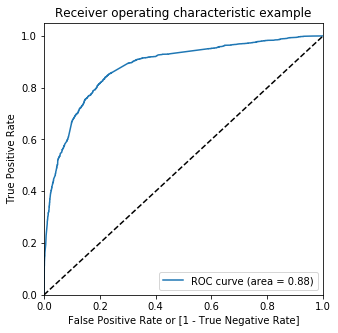

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

The area under the ROC curve is 0.88, which is a very good value.

### 6.6. Find the optimal probability cutoff.

In [129]:
# To find cutoff we need to create some columns with different probability cutoff.

probability_numbers = [float(x) / 10 for x in range(10)]
for i in probability_numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x > i else 0)
y_train_pred_final

,Converted,Conversion_Probability,Lead_ID,Predicted_Value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.357856,2609,0,1,1,1,1,0,0,0,0,0,0
1,1,0.928846,3971,1,1,1,1,1,1,1,1,1,1,1
2,0,0.073244,324,0,1,0,0,0,0,0,0,0,0,0
3,1,0.770867,7127,1,1,1,1,1,1,1,1,1,0,0
4,0,0.984155,3064,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1,0.876283,5015,1,1,1,1,1,1,1,1,1,1,0
6214,1,0.934760,7570,1,1,1,1,1,1,1,1,1,1,1
6215,0,0.356589,1414,0,1,1,1,1,0,0,0,0,0,0
6216,0,0.053919,7572,0,1,0,0,0,0,0,0,0,0,0


In [130]:
# For this probabilities calculate accuracy, specificity, sensitivity.

Probability_Cutoff_df = pd.DataFrame(columns = ["Probability", "Accuracy", "Sensitivity", "Specificity"])

prob_num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in prob_num:
    con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(con_mat))
    Accuracy = (con_mat[0, 0] + con_mat[1, 1]) / total
    Specificity = con_mat[0, 0] / (con_mat[0, 0] + con_mat[0, 1])
    Sensitivity = con_mat[1, 1] / (con_mat[1, 0] + con_mat[1, 1])
    Probability_Cutoff_df.loc[i] = [i, Accuracy, Specificity, Sensitivity]
Probability_Cutoff_df    

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.388710,0.000000,1.000000
0.1,0.1,0.563043,0.304920,0.968970
0.2,0.2,0.760212,0.665614,0.908978
0.3,0.3,0.802348,0.777427,0.841539
0.4,0.4,0.809746,0.830571,0.776996
0.5,0.5,0.810711,0.878453,0.704179
0.6,0.6,0.792216,0.918443,0.593711
0.7,0.7,0.777099,0.952118,0.501862
0.8,0.8,0.756031,0.972376,0.415805
0.9,0.9,0.718237,0.987109,0.295408


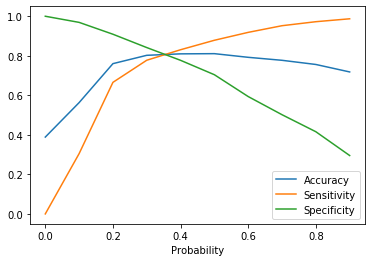

In [131]:
# Plot a graph for probabilities of Accuracy, Sensitivity, Specificity.

Probability_Cutoff_df.plot.line(x = "Probability", y = ["Accuracy", "Sensitivity", "Specificity"])
plt.show()

From the above curve we can observe that the 0.36 is the optimal point to take it as a cutoff probability.

In [132]:
# Creating dataframe after selecting good cutoff of 0.36.

y_train_pred_final["Predicted_After_Final_Cutoff"] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,Predicted_Value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_After_Final_Cutoff
0,1,0.357856,2609,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.928846,3971,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.073244,324,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.770867,7127,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.984155,3064,1,1,1,1,1,1,1,1,1,1,1,1


#### Confusion Matrix.

In [133]:
# Create confusion matrix to evaluate the model.

conf_matrix_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_After_Final_Cutoff)
conf_matrix_2

array([[3078,  723],
       [ 473, 1944]], dtype=int64)

In [134]:
# Check True Positive
True_Positive_2 = conf_matrix_2[1, 1]

# Check True Negative
True_Negative_2 = conf_matrix_2[0, 0]

# Check False Positive
False_Positive_2 = conf_matrix_2[0, 1]

# Check False Negative
False_Negative_2 = conf_matrix_2[1, 0]

#### Accuracy.

In [135]:
# Check for accuracy of model.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_After_Final_Cutoff)

0.8076551945963333

#### Sensitivity.

In [136]:
# Check the sensitivity for model.

Sensitivity_2 = True_Positive_2 / float(True_Positive_2 + False_Negative_2)
Sensitivity_2

0.8043028547786513

#### Specificity.

In [137]:
# Check the specificity for model.

Specificity_2 = True_Negative_2 / float(True_Negative_2 + False_Positive_2)
Specificity_2

0.8097868981846882

### Precision and Recall.

In [138]:
# Check the Precision for model.

Precision = True_Positive_2 / float(True_Positive_2 + False_Positive_2)
Precision

0.7289088863892014

In [139]:
# Check the Recall for model.

Recall = True_Positive_2 / float(True_Positive_2 + False_Negative_2)
Recall

0.8043028547786513

#### Precision Score.

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)

0.7865064695009242

#### Recall Score.

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)

0.7041787339677286

#### F1-Score

In [142]:
# Check for F1-Score.

F1_Score_ = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score_

0.7647521636506689

#### False Positive Rate

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned

False_Positive_Rate = (False_Positive_2 / float(True_Negative_2 + False_Positive_2))
False_Positive_Rate

0.19021310181531176

#### Positive Predictive Value

In [144]:
# Positive predictive value 

Positive_Predictive_Value = (True_Positive_2 / float(True_Positive_2 + False_Positive_2))
Positive_Predictive_Value

0.7289088863892014

#### Negative Predictive Value

In [145]:
# Negative predictive value

Negative_Predictive_Value = (True_Negative_2 / float(True_Negative_2 + False_Negative_2))
Negative_Predictive_Value

0.8667980850464658

### 6.7. Making Predictions on Test Set.

In [146]:
# Perform scalling on test data.

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [147]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [148]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
8723,0,-0.465877,0,0,0,0,0,1,0,0
8932,0,-0.656721,0,0,0,0,0,0,0,0
6842,0,2.054784,1,0,0,0,0,0,0,0
3018,0,-0.530121,1,0,0,0,0,1,0,0
3869,0,-0.747420,1,0,0,0,0,1,0,0


In [149]:
# Adding a constant.

X_test_sm = sm.add_constant(X_test)

In [150]:
# Making prediction on test set.

y_test_pred = res.predict(X_test_sm)

In [151]:
# Check result.

y_test_pred

8723    0.177032
8932    0.076643
6842    0.600128
3018    0.137286
3869    0.110246
          ...   
385     0.159233
4364    0.098655
3316    0.134515
8034    0.285589
8686    0.708309
Length: 2666, dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array.

y_pred = pd.DataFrame(y_test_pred)

In [153]:
# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

In [154]:
# Add Cust ID in index.

y_test_df["Lead_ID"] = y_test_df.index

In [155]:
# Remove index for both dataframes to append them side by side.

y_pred.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [156]:
# Appending y_test_df and y_pred

y_pred_final = pd.concat([y_test_df, y_pred], axis = 1)

In [157]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,8723,0.177032
1,0,8932,0.076643
2,1,6842,0.600128
3,0,3018,0.137286
4,0,3869,0.110246


In [158]:
# Rename the resulting column

y_pred_final = y_pred_final.rename(columns = {0 : "Converted_Probability_2"})

In [159]:
# Making predictions using selected cutoff of 0.36

y_pred_final["Final_Predicted"] = y_pred_final.Converted_Probability_2.map(lambda x : 1 if x > 0.36 else 0)
y_pred_final.head()

,Converted,Lead_ID,Converted_Probability_2,Final_Predicted
0,0,8723,0.177032,0
1,0,8932,0.076643,0
2,1,6842,0.600128,1
3,0,3018,0.137286,0
4,0,3869,0.110246,0


In [160]:
# Calculating Lead Score

y_pred_final["Lead_Score"] = y_pred_final.Converted_Probability_2.map( lambda x : round(x * 100))
y_pred_final.head()

,Converted,Lead_ID,Converted_Probability_2,Final_Predicted,Lead_Score
0,0,8723,0.177032,0,18
1,0,8932,0.076643,0,8
2,1,6842,0.600128,1,60
3,0,3018,0.137286,0,14
4,0,3869,0.110246,0,11


#### Accuracy

In [161]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8034508627156789

#### Confusion Matrix

In [162]:
# Create confusion matrix to evaluate the model.

conf_matrix_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
conf_matrix_3

array([[1317,  331],
       [ 193,  825]], dtype=int64)

#### TP, TN, FP, FN

In [163]:
# Check True Positive
True_Positive_3 = conf_matrix_3[1, 1]

# Check True Negative
True_Negative_3 = conf_matrix_3[0, 0]

# Check False Positive
False_Positive_3 = conf_matrix_3[0, 1]

# Check False Negative
False_Negative_3 = conf_matrix_3[1, 0]

#### Sensitivity

In [164]:
# Check the sensitivity for model.

Sensitivity_3 = True_Positive_3 / float(True_Positive_3 + False_Negative_3)
Sensitivity_3

0.8104125736738703

#### Specificity

In [165]:
# Check the specificity for model.

Specificity_3 = True_Negative_3 / float(True_Negative_3 + False_Positive_3)
Specificity_3

0.7991504854368932

### Precision and Recall.

In [166]:
# Check the Precision for model.

Precision_2 = True_Positive_3 / float(True_Positive_3 + False_Positive_3)
Precision_2

0.7136678200692042

In [167]:
# Check the Recall for model.

Recall_2 = True_Positive_3 / float(True_Positive_3 + False_Negative_3)
Recall_2

0.8104125736738703

#### Precision Score

In [168]:
precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7136678200692042

#### Recall Score

In [169]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8104125736738703

#### F1-Score.

In [170]:
# Check for F1-Score.

F1_Score = 2 * ((Precision_2 * Recall_2) / (Precision_2 + Recall_2))
F1_Score

0.7589696412143514

#### False Positive Rate

In [171]:
# Calculate false postive rate - predicting churn when customer does not have churned

False_Positive_Rate = (False_Positive_3 / float(True_Negative_3 + False_Positive_3))
False_Positive_Rate

0.2008495145631068

#### Positive Predictive Value

In [172]:
# Positive predictive value 

Positive_Predictive_Value = (True_Positive_3 / float(True_Positive_3 + False_Positive_3))
Positive_Predictive_Value

0.7136678200692042

#### Negative Predictive Value

In [173]:
# Negative predictive value

Negative_Predictive_Value = (True_Negative_3 / float(True_Negative_3 + False_Negative_3))
Negative_Predictive_Value

0.8721854304635761

### ROC-Curve.

In [174]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, 
                                         y_pred_final.Converted_Probability_2, drop_intermediate = False)

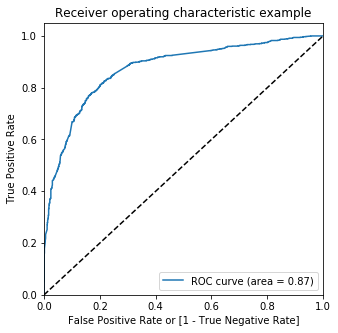

In [176]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Probability_2)

The area under the ROC curve is 0.88, which is a very good value.

## Step 7. Observation and Conclusion.


Training Set : 
- Accuracy : 80.76%
- Sensitivity : 80.43%
- Specificity : 80.97%
- Precision : 78.65%
- Recall : 70.41%
- F1-Score : 76.47%
- False Positive Rate : 19.02%
- Positive Predictive Value : 72.89%
- Negative Predictive Value : 86.67%

Test Set :
- Accuracy : 80.34%
- Sensitivity : 81.04%
- Specificity : 79.91%
- Precision : 71.36%
- Recall : 81.04%
- F1-Score : 75.89%
- False Positive Rate : 20.08%
- Positive Predictive Value : 71.36%
- Negative Predictive Value : 87.21%


The features which are most mattered in lead conversion are :
(Arranging from most important to less important by comparing the coefficient.)
1. Lead Origin_Lead Add Form
2. Lead Source_Welingak Website
3. What is your current occupation_Working Professional
4. Last Notable Activity_SMS Sent
5. Do Not Email
6. Total Time Spent on Website
7. Last Notable Activity_Olark Chat Conversation
8. Lead Source_Olark Chat
9. Last Notable Activity_Email Opened
10. Lead Origin_Landing Page Submission